In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Подготовка данных

In [2]:
df_images = pd.read_csv("offsets_coordinates.csv")
df_1 = pd.read_excel("1.xlsx")
df_2 = pd.read_excel("2.xlsx")

In [3]:
df_answers = pd.concat([df_1, df_2], axis=1)
df_answers.head()

,time,gender,is_with_video,normal,hor_left_3,hor_left_5,hor_left_8,hor_left_11,hor_right_4,hor_right_7,...,hor_left_12,hor_left_14,hor_right_6,hor_right_9,hor_right_13,seq_large_6,seq_large_11,seq_small_5,seq_small_6,seq_small_9
0,2023-10-25 20:01:54.491,Ж,Нет,4,2,2,3,2,4,4,...,3,2,4,4,2,4,4,5,2,2
1,2023-10-25 20:42:42.954,М,Да,5,5,4,3,3,4,3,...,2,3,4,3,4,5,5,4,3,2
2,2023-10-25 20:49:30.885,Ж,Да,2,4,4,2,3,4,2,...,2,2,2,1,2,3,4,4,3,1
3,2023-10-25 20:56:49.366,Ж,Да,4,4,3,2,2,3,2,...,2,2,3,2,2,4,2,5,3,2
4,2023-10-25 21:11:51.331,Ж,Да,5,5,4,4,4,4,3,...,2,2,3,3,2,4,4,5,2,2


In [4]:
# считаем количество оценок в каждом столбце df_answers
ratings = ['5', '4', '3', '2', '1']

df_count_ratings = pd.DataFrame()
for column in df_answers.columns.difference(['time', 'gender', 'is_with_video', 'age']):
    df_count_ratings[column] = [df_answers[column].eq(int(rating)).sum() for rating in ratings]

df_count_ratings.index = ratings[0:5]  
df_count_ratings = df_count_ratings.transpose()
df_count_ratings.head()

,5,4,3,2,1
hor_left_11,1,10,15,16,1
hor_left_12,1,9,18,13,2
hor_left_14,0,3,19,17,4
hor_left_3,16,19,6,2,0
hor_left_4,11,24,7,1,0


In [5]:
# считаем среднее значение оценки для кажого столбца
numeric_columns = df_answers.select_dtypes(include='number')
column_mean_map = numeric_columns.mean().to_dict()
df_images['mean'] = df_images['name'].map(column_mean_map)

# Объединяем датафреймы по столбцу 'name'
df_result = pd.merge(df_images, df_count_ratings, left_on='name', right_index=True)
df_result.head()

,name,1_x,1_y,9_x,9_y,17_x,17_y,28_x,28_y,up_y,square,mean,5,4,3,2,1
0,normal,678,321,828,584,836,304,996,314,197,138384,4.418605,23,16,3,1,0
1,hor_left_3,600,324,755,584,760,303,922,313,197,138012,4.139535,16,19,6,2,0
2,hor_left_4,576,318,729,584,735,303,895,312,197,138384,4.046512,11,24,7,1,0
3,hor_left_5,550,323,703,583,710,304,868,314,197,138384,3.860465,9,22,9,3,0
4,hor_left_7,502,323,655,584,661,305,819,316,197,138384,3.627907,4,24,11,3,1


#### Горизонтальное смещение

In [6]:
# получаем датафрейм значений горизонтальных смещений
df_hor = df_result[df_result['name'].isin(['normal']) | df_result['name'].str.startswith('hor_')]
df_hor.head()

,name,1_x,1_y,9_x,9_y,17_x,17_y,28_x,28_y,up_y,square,mean,5,4,3,2,1
0,normal,678,321,828,584,836,304,996,314,197,138384,4.418605,23,16,3,1,0
1,hor_left_3,600,324,755,584,760,303,922,313,197,138012,4.139535,16,19,6,2,0
2,hor_left_4,576,318,729,584,735,303,895,312,197,138384,4.046512,11,24,7,1,0
3,hor_left_5,550,323,703,583,710,304,868,314,197,138384,3.860465,9,22,9,3,0
4,hor_left_7,502,323,655,584,661,305,819,316,197,138384,3.627907,4,24,11,3,1


#### Вертикальное смещение

In [7]:
# получаем датафрейм значений вертикальных смещений
df_ver = df_result[df_result['name'].isin(['normal']) | df_result['name'].str.startswith('ver_')]
df_ver.head()

,name,1_x,1_y,9_x,9_y,17_x,17_y,28_x,28_y,up_y,square,mean,5,4,3,2,1
0,normal,678,321,828,584,836,304,996,314,197,138384,4.418605,23,16,3,1,0
25,ver_6,678,321,828,584,836,304,996,314,197,138384,4.232558,20,16,4,3,0
26,ver_8,675,273,829,533,835,254,996,263,156,138012,3.186047,5,15,10,9,4
27,ver_11,677,193,828,459,836,179,996,185,73,138384,2.348837,2,4,14,10,13
28,ver_13,675,148,827,409,836,129,995,138,32,138384,1.790698,0,1,10,11,21


#### Изменение крупности лица

In [8]:
# получаем датафрейм значений изменений крупности лица на изображении
df_seq = df_result[df_result['name'].isin(['normal']) | df_result['name'].str.startswith('seq_')]
df_seq.head()

,name,1_x,1_y,9_x,9_y,17_x,17_y,28_x,28_y,up_y,square,mean,5,4,3,2,1
0,normal,678,321,828,584,836,304,996,314,197,138384,4.418605,23,16,3,1,0
15,seq_large_4,667,357,832,646,838,336,1008,349,238,138384,3.930233,16,14,8,4,1
16,seq_large_6,660,366,833,677,839,352,1016,362,237,198916,3.441860,5,20,10,5,3
17,seq_large_9,655,399,832,723,841,378,1025,392,280,138012,3.162791,7,12,8,13,3
18,seq_large_11,654,417,835,754,843,394,1030,411,286,198916,2.767442,2,12,10,12,7


# Вычисление параметров смещения

У нас есть график распределения оценок в зависимости от расстояния. Вопрос, на который теперь мы можем ответить: "В каком интервале с вероятностью 0.95 пользователь из генеральной совокупности поставит оценку 5 изображению?"  
Чтобы ответить на этот вопрос, можно использовать t-test для проверки средних значений выборок. Но его применение ограничивается следующими условиями:  
1. В выборке достаточно большое количество измерений  
2. Распределение выборки схоже с нормальным  

Проведем все необходимые измерения на примере горизонтального смещения изображения.

### Вычисления для горизонтальногго смещения

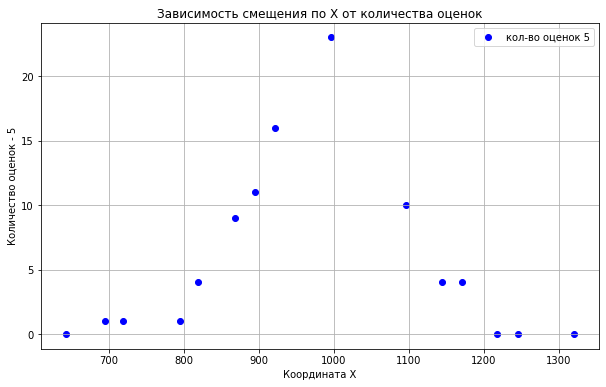

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df_hor['28_x'], df_hor['5'], color='blue', label='кол-во оценок 5')
plt.title('Зависимость смещения по X от количества оценок')
plt.xlabel('Координата X')
plt.ylabel('Количество оценок - 5')
plt.legend()
plt.grid(True)
plt.show()

Распределение похоже на нормальное, но количество измерений не такое большое, поэтому проведем статистический тест Шапиро-Уилка для определения схожести с нормальным распределением. 
Выдвенем гипотезы:  
$H_0$: Данные распреелены нормально  
$H_1$: Данные распределены не нормально   
Возьмем стандартный уровень значимости  $\alpha$ = 0.05

In [10]:
stat, p_value = shapiro(df_hor['5'])

alpha = 0.05
if p_value < alpha:
    print("Распределение статистически значимо схоже с нормальным")
else:
    print("Распределение статистически значимо не cхоже с нормальным")

Распределение статистически значимо схоже с нормальным


Мы можем говорить, что данные оценок при смещении по горизонтали распределены нормально. Следовательно, можно применять t-test. Для этого посмотрим основные параметры нашего распределения и вычислим границы для 5% уровня значимости по известным формулам, которые говорят, что оценка в генеральной совокупности будет лежать в интервале     
$$
[{mean - t*STD \over \sqrt{n}}  ; {mean + t*STD \over \sqrt{n}}]  
$$

In [11]:
df_hor['28_x'].describe()

count      15.000000
mean      969.666667
std       218.071963
min       643.000000
25%       807.000000
50%       922.000000
75%      1157.500000
max      1320.000000
Name: 28_x, dtype: float64

Подставим значения

In [12]:
# делаем двусторонний тест, поэтому t-значение высчитывается по формуле:
t = scipy.stats.t.ppf(q=1-.05/2,df=df_hor.shape[0])

mean = df_hor['28_x'].mean()
num = t * df_hor['28_x'].std()
delim = math.sqrt(df_hor.shape[0])

left = mean - (num / delim)
right = mean + (num / delim)
print(f'T in [{left}; {right}]')

T in [849.6533992639215; 1089.6799340694117]


Получается, что с вероятностью 0.95 пользователь из генеральной совокупности поставит изображению оценку "5", если центр лица на нем по горизонтали расположен в пределах [850; 1090]  
Изначальное изображение было с разрешением 1920x1080, значит в общем случае мы получили границы смещения $\pm$11% от центра картинки

### Вычисления остальных параметров

По аналогии с горизонтальным смещением можно получить параметры для вертикального смещения и изменения крупности лица на изображении.

In [13]:
# делаем двусторонний тест, поэтому t-значение высчитывается по формуле:
t = scipy.stats.t.ppf(q=1-.05/2,df=df_ver.shape[0])

mean = df_ver['28_y'].mean()
num = t * df_ver['28_y'].std()
delim = math.sqrt(df_ver.shape[0])

left = mean - (num / delim)
right = mean + (num / delim)
print(f'T in [{left}; {right}]')

T in [152.15135551099294; 333.44864448900705]


Получается, что с вероятностью 0.95 пользователь из генеральной совокупности поставит изображению оценку "5", если центр лица на нем по вертикали расположен в пределах [152; 333]  
Изначальное изображение было с разрешением 1920x1080, значит в общем случае границы смещения равны - 16% и 31% от верхней границы картинки.

In [14]:
# делаем двусторонний тест, поэтому t-значение высчитывается по формуле:
t = scipy.stats.t.ppf(q=1-.05/2,df=df_seq.shape[0])

mean = df_seq['square'].mean()
num = t * df_seq['square'].std()
delim = math.sqrt(df_seq.shape[0])

left = mean - (num / delim)
right = mean + (num / delim)
print(f'T in [{left}; {right}]')

T in [106072.85485006591; 165204.96333175228]


Изначальное изображение имело полную площадь картинки: 1920 * 1080 = 2073600. Значит по полученным данным площадь изображения лица должна составлять от 5% до 8% от площади всего изображения.

# Выводы

По результатам исследования оптимальными параметрами для интуитивно приятного расположения лица в кадре являются:  
1. По горизонтали $\pm$11% от центра изображения
2. По вертикали [16%; 31%] от верхней границы изображения
3. Площадь лица должна составлять [5%; 8%] от площади всего изображения  

Важно отметить, что в ходе проведенного статистического исследования анализ осуществлялся для каждого признака независимо.  
Для проверки полученных результатов и получении информации о совокупном влиянии признаков предполагается провести дополнительное тестирование пользователей.